# MODEL SIMULASI UNTUK OPTIMASI PENENTUAN WAKTU MEMASAK BUAH KELAPA SAWIT DENGAN LOGIKA FUZZY MAMDANI

NAMA :NUZULA RAHMA SAFITRI

NIM :09011281722083

KELAS :SK5A

Model simulasi untuk optimasi penentuan waktu memasak buah kelapa sawit dengan logika fuzzy. Telah
dibangun suatu model simulasi untuk mengoptimasi waktu memasak buah kelapa sawit pada suatu proses
perebusan. Metode yang digunakan untuk membangun model simulasi dalam optimasi ini adalah logika
fuzzy. Dalam penelitian ini sebagai variabel bebasnya adalah jumlah buah kelapa sawit dan tekanan uap air
dalam sterillizer, sedangkan sebagai variabel tak bebasnya atau nilai yang dicari adalah waktu memasak
buah kelapa sawit. Variabel bebas jumlah buah kelapa sawit diasumsikan dengan fungsi keanggotaan
Sedikit, Standard dan Banyak sedangkan variabel bebas tekanan uap air dalam sterillizer diasumsikan
dengan fungsi keanggotaan Kecil, Normal dan Besar. Untuk variabel tak bebas waktu memasak diasumsikan
fungsi keanggotaan adalah Singkat, Normal dan Lama. Aturan fuzzy yang digunakan ada 9 aturan.
Defuzzyfikasinya menggunakan metode Mamdani. Untuk menyelesaikan persoalan tersebut, digunakan
perangkat lunak MATLAB. Hasil penelitian menunjukkan bahwa untuk optimasi waktu memasak buah kelapa
sawit dapat menggunakan logika fuzzy. Dalam penelitian ini yang dibahas baru pada proses perebusannya
saja dan akan dikembangkan untuk pemrograman fuzzy yang ditanam di dalam mikrokontroller.Variable yang digunakan berjumlah 3 variabel yaitu 2 variabel input dan 1 variabel output. Dari 3 variabel tersebut terdiri 3 himpunan fuzzy yaitu sedikit, setandar, dan banyak.

Maka, dari latar belakang tersebut setiap keadaan dari varibel input dan output akan dijabarkan dalam linguistik sebagai berikut:
## Input
### - banyak buah
   Kategori himpunan fuzzy:
   - **Sedikit  :** 10
   - **Standar :** 15
   - **Banyak :** ≥ 20
 
### - tekanan uap
   Kategori himpunan fuzzy:
   - **kecil :** 3
   - **normal :** 5
   - **Besar :** ≥ 5
 
## Output
### - waktu masak
   Kategori himpunan fuzzy:
   - **Sedikit :** 20
   - **Sedang :** 40
   - **Banyak :** ≥ 40

### Mengimpor library untuk fuzzy
Library yang akan digunakan adalah numpy, skfuzzy, dan matplotlib.pyplot. Selain itu kita juga menggunakan fungsi control dari library skfuzzy.

#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import numpy as np #import numpy gunkan np untuk menggunakan library ini
import skfuzzy as fuzz #import library fuzzy gunakan fuzz untuk menggunkaan library ini
from skfuzzy import control as ctrl #panggi library control dari skfuzzy gunakan ctrl untuk menggunakan library ini

### Mengimpor library untuk fuzzy
Library yang akan digunakan adalah numpy, skfuzzy, dan matplotlib.pyplot. Selain itu kita juga menggunakan fungsi control dari library skfuzzy.

In [5]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import numpy as np #import numpy gunkan np untuk menggunakan library ini
import skfuzzy as fuzz #import library fuzzy gunakan fuzz untuk menggunkaan library ini
import matplotlib.pyplot as plt #import matplotlib.pyplot untuk menggunakan library ini
from skfuzzy import control as ctrl #panggi library control dari skfuzzy gunakan ctrl untuk menggunakan library ini

# Fuzzyfikasi
### Menentukan variabel dan semesta pembicaraan
Pada langkah ini, setiap variabel input dan output akan ditentukan nilai semesta pembicaraannya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan oleh proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal dan batas akhir (crisp).

In [6]:
# Input
buah = ctrl.Antecedent(np.arange(0,26,1), 'banyak buah') #variabel banyak buah dengan nilai 0 sampai 26 dengan range 1
uap = ctrl.Antecedent(np.arange(0,7,1), 'tekanan uap') #variabel tekanan uap dengan nilai 0 sampai 7 dengan range 1

# Output
waktu = ctrl.Consequent(np.arange(1,42,1), 'waktu masak')

# Plotting
buah1 = np.arange(0,26,1) #untuk plotting 
uap1 = np.arange(0,7,1) #untuk plotting 
waktu1 = np.arange(1,42,1) #untuk plotting 

`Antecedent` adalah premis atau sebagai input, dan `consequent` adalah kesimpulan atau sebagai output. Dan angka-angka yang terdapat di dalam kurung merupakan batas-batas yang formatnya _**(batas awal, batas akhir, kelipatan)**_, selanjutnya batas tersebut diberi label dengan nama variabelnya.

### Menentukan Himpunan Fuzzy
Setelah menentukan semesta pembicaraan atau crisp dari masing-masing variabel dalam bentuk numerik, maka selanjutnya kita akan membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal.

Karena kita akan menggunakan kurva segitiga dan trapesium, maka fungsi yang akan digunakan adalah `fuzz.trimf` untuk kurva segitiga, dan `fuzz.trapmf` untuk kurva trapesium. Lalu untuk mendefinisikan masing-masing domainnya, digunakan `variabel.universe`. Selanjutnya terdapat batas-batas(domain) yang formatnya adalah `[batas awal, titik puncak, batas akhir]` untuk kurva segitiga, `[batas awal, titik puncak, titik puncak, batas akhir]` untuk kurva trapesium.
Jadi perintahnya adalah:
`variabel['nama himpunan fuzzy'] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])` untuk kurva segitiga, dan `variabel['nama himpunan fuzzy'] = fuzz.trapmf(variabel.universe, [batas awal, titik puncak, titik puncak, batas akhir])` untuk kurva trapesium.

# Fuzzifikasi Buah

$bb [sedikit] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 0 \\
       {10-x \over 10} & \mbox{; } 0 < x < 10 \\
       0 & \mbox{; } x \geq 10
    \end{array}
\right.$

$bb [setandar] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 5 \\
       {x-5 \over 5} & \mbox{; } 5 < x ≤ 10 \\
       {15-x \over 5} & \mbox{; } 10 < x < 15 \\
    \end{array}
\right.$
    
$bb [banyak] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 10 \\
       {x-10 \over 10} & \mbox{; } 10 < x < 20 \\
       1 & \mbox{; } x \geq 20
    \end{array}
\right.$


In [7]:
#membuat membership function untuk variabel banyak buah
buah['sedikit'] = fuzz.trapmf(buah.universe,(1,1,5,10)) #membership function sedikit, dalam bentuk trapesium dengan nilai 0 - 10
buah['standar'] = fuzz.trimf(buah.universe,(5,10,15)) #membership function standar, dg bentuk segitiga dg nilai 5 - 15
buah['banyak'] = fuzz.trapmf(buah.universe,(10,15,25,25)) #membership function banyak, dg bentuk trapesium dg nilai 10 - 25

Text(0.5,1,'buah sedikit')

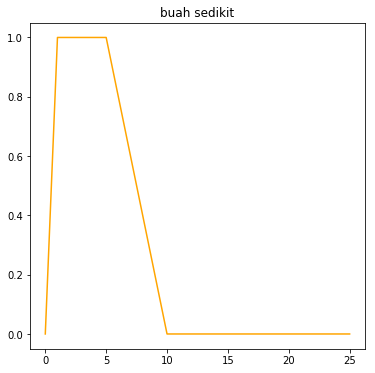

In [8]:
buah_sedikit = fuzz.trapmf(buah1,[1,1,5,10])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(buah1,buah_sedikit,'orange')
ax0.set_title('buah sedikit')

Text(0.5,1,'buah standar')

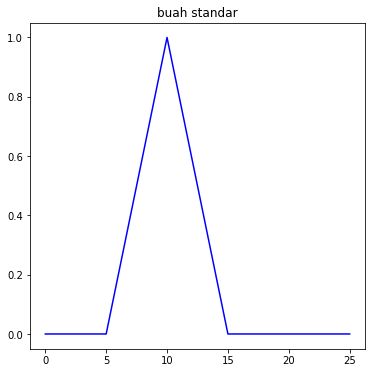

In [9]:
buah_standar = fuzz.trimf(buah1,[5,10,15])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(buah1,buah_standar,'blue')
ax0.set_title('buah standar')

Text(0.5,1,'buah banyak')

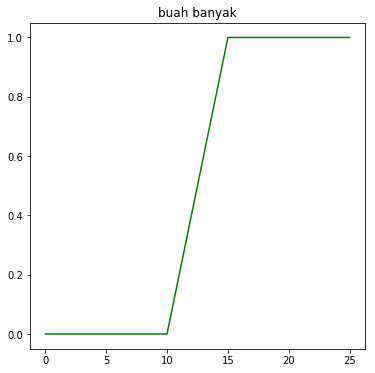

In [10]:
buah_banyak = fuzz.trapmf(buah1,[10,15,25,25])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(buah1,buah_banyak,'green')
ax0.set_title('buah banyak')

# Fuzzifikasi Uap

$tu [kecil] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 1 \\
       {3-x \over 2} & \mbox{; } 1 < x < 3 \\
       0 & \mbox{; } x \geq 3
    \end{array}
\right.$

$tu [normal] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 1 \\
       {x-1 \over 2} & \mbox{; } 1 < x ≤ 3 \\
       {5-x \over 2} & \mbox{; } 3 < x < 5 \\
    \end{array}
\right.$
    
$tu [besar] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 3 \\
       {x-3 \over 2} & \mbox{; } 3 < x < 5 \\
       1 & \mbox{; } x \geq 5
    \end{array}
\right.$


In [20]:
#membuat membership function untuk variabel tekanan uap
uap['kecil'] = fuzz.trapmf(uap.universe,[1,1,2,3]) #membership function sedikit, dalam bentuk trapesium dengan nilai 0 - 3
uap['normal'] = fuzz.trimf(uap.universe,[2,3,5]) #membership function normal, dg bentuk segitiga dg nilai 1 - 5
uap['besar'] = fuzz.trapmf(uap.universe,[3,5,6,6]) #membership function banyak, dg bentuk trapesium dg nilai 3 - 6

Text(0.5,1,'tekanan uap kecil')

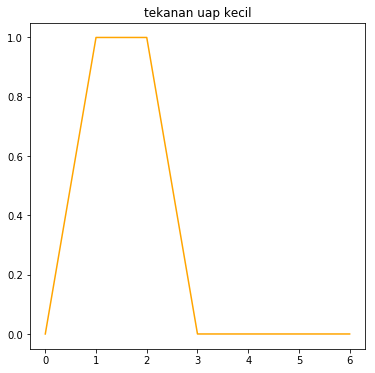

In [21]:
uap_kecil= fuzz.trapmf(uap1,[1,1,2,3])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(uap1,uap_kecil,'orange')
ax0.set_title('tekanan uap kecil')

Text(0.5,1,'tekanan uap normal')

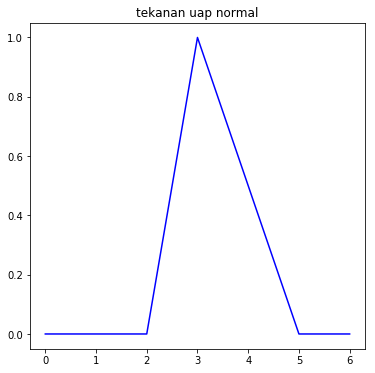

In [22]:
uap_normal= fuzz.trimf(uap1,[2,3,5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(uap1,uap_normal,'blue')
ax0.set_title('tekanan uap normal')

Text(0.5,1,'tekanan uap besar')

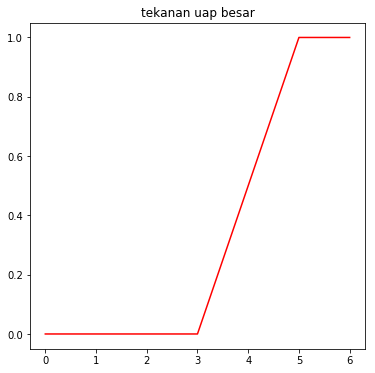

In [23]:
uap_besar= fuzz.trapmf(uap1,[3,5,6,6])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(uap1,uap_besar,'red')
ax0.set_title('tekanan uap besar')

# Fuzzifikasi Waktu

$tu [singkat] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 0 \\
       {20-x \over 2} & \mbox{; } 0 < x < 20 \\
       0 & \mbox{; } x \geq 20
    \end{array}
\right.$

$tu [sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 0 \\
       {x-0 \over 2} & \mbox{; } 0 < x ≤ 20 \\
       {40-x \over 2} & \mbox{; } 20 < x < 40 \\
    \end{array}
\right.$
    
$tu [lama] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 20 \\
       {x-20 \over 2} & \mbox{; } 20 < x < 40 \\
       0 & \mbox{; } x \geq 40
    \end{array}
\right.$


In [25]:
#membuat membership function untuk variabel waktu masak
waktu['singkat'] = fuzz.trapmf(waktu.universe,(1,1,10,20)) #membership function singkat, dalam bentuk trapesium dengan nilai 0 - 20
waktu['sedang'] = fuzz.trimf(waktu.universe,(10,20,40)) #membership function sedang, dalam bentuk segitiga dengan nilai 0 - 40
waktu['lama'] = fuzz.trapmf(waktu.universe,(20,40,41,41)) #membership function lama, dalam bentuk trapesium dengan nilai 20 - 40

Text(0.5,1,'waktu masak singkat')

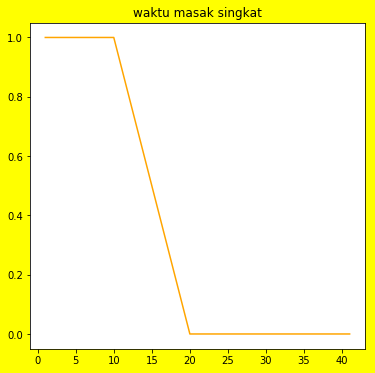

In [26]:
waktu_singkat = fuzz.trapmf(waktu1,[1,1,10,20])
fig,(ax0) = plt.subplots(nrows=1, figsize=(6,6), facecolor='yellow')
ax0.plot(waktu1,waktu_singkat,'orange')
ax0.set_title('waktu masak singkat')

Text(0.5,1,'waktu masak sedang')

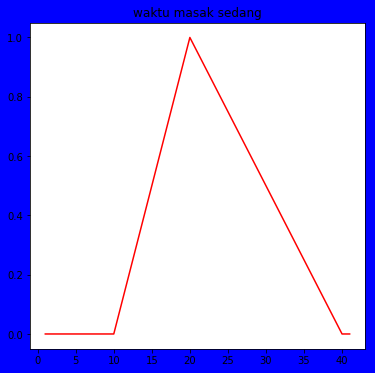

In [27]:
waktu_sedang = fuzz.trimf(waktu1,[10,20,40])
fig,(ax0) = plt.subplots(nrows=1, figsize=(6,6), facecolor='blue')
ax0.plot(waktu1,waktu_sedang,'red')
ax0.set_title('waktu masak sedang')

Text(0.5,1,'waktu masak lama')

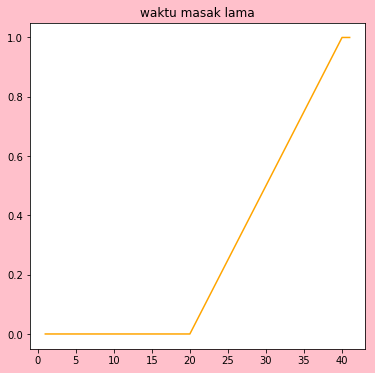

In [28]:
waktu_lama = fuzz.trapmf(waktu1,[20,40,41,41])
fig,(ax0) = plt.subplots(nrows=1, figsize=(6,6), facecolor='pink')
ax0.plot(waktu1,waktu_lama,'orange')
ax0.set_title('waktu masak lama')

# Menampilkan grafik Fungsi Keanggotaan

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


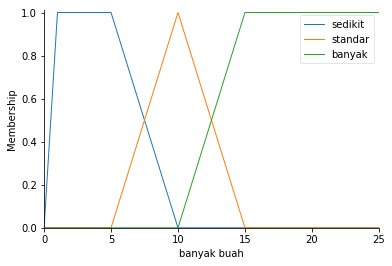

In [30]:
buah.view()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


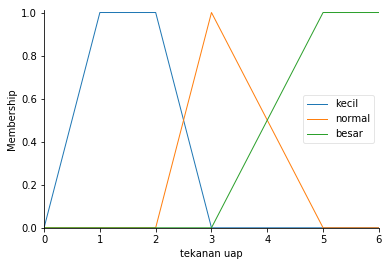

In [31]:
uap.view()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


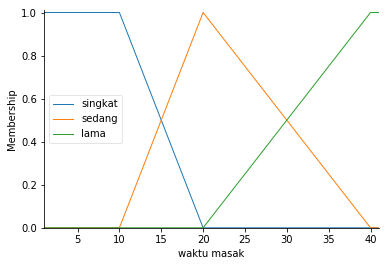

In [32]:
waktu.view()

# Operasi Fuzzy dan Implikasi Rule Base

| No | banyak buah| tekanan uap | waktu memasak | 
|----|------------|-------------|---------------|
| 1  |   sedikit  |   besar     |    singkat    |   
| 2  |   sedikit  |   normal    |    sedang     |   
| 3  |   sedikit  |   kecil     |    sedang     |  
| 4  |   standar  |   besar     |    singkat    |   
| 5  |   standar  |   normal    |    sedang     |   
| 6  |   standar  |   kecil     |     lama      |   
| 7  |   banyak   |   besar     |    Sedang     |  
| 8  |   banyak   |   normal    |     lama      |   
| 9  |   banyak   |   kecil     |     lama      |  


<center>__Tabel 1.1 Rule yang Digunakan__

### Penentuan rule base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9a41730>)

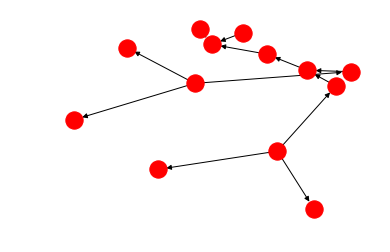

In [37]:
#membuat aturan untuk menentukan  
#karena input ada 2 dan setiap input mempunyai dua kondisi maka saya membuat 9 aturan atau 3*3
rule1 = ctrl.Rule(buah['sedikit'] & uap['besar'], waktu['singkat'])
rule2 = ctrl.Rule(buah['sedikit'] & uap['normal'], waktu['singkat'])
rule3 = ctrl.Rule(buah['sedikit'] & uap['kecil'], waktu['sedang'])
rule4 = ctrl.Rule(buah['standar'] & uap['besar'], waktu['singkat'])
rule5 = ctrl.Rule(buah['standar'] & uap['normal'], waktu['sedang'])
rule6 = ctrl.Rule(buah['standar'] & uap['kecil'], waktu['lama'])
rule7 = ctrl.Rule(buah['banyak'] & uap['besar'], waktu['sedang'])
rule8 = ctrl.Rule(buah['banyak'] & uap['normal'], waktu['lama'])
rule9 = ctrl.Rule(buah['banyak'] & uap['kecil'], waktu['lama'])

rule1.view() #mencetak gambar aturan

### Menggabungkan semua rule untuk dijadikan sebagai control system

In [38]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### Menggunakan mode simulasi

In [39]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Defuzzifikasi

# Contoh Kasus

Bagaimanakah waktu memasak jika Banyak Buah bernilai 15 dan Tekanan Uap bernilai 10?

# Banyak Buah = 15

- standar [15] = (15 - 15) / (15 - 10) <br>
<font color=orange>standar [15] = 0</font>


$ \mu standar[15] =
\left\{
    \begin{array}{ll}
       {15-15 \over 15-10} = 0 \\
    \end{array}
\right.$

- banyak [15] = (15 - 10) / (25 - 10) <br>
<font color=blue>banyak [15] = 0.3</font>


$ \mu Banyak[15] =
\left\{
    \begin{array}{ll}
       {15-10 \over 25-10} = 0.3 \\
    \end{array}
\right.$


# Tekanan Uap = 10

- Tekanan Uap [10] = (15 - 10) / (15 - 5) <br>
<font color=green>Tekanan Uap [10] = 0,5</font>

$ \mu sedang[10] =
\left\{
    \begin{array}{ll}
       {15-10 \over 15-5} = 0.5 \\
    \end{array}
\right.$

In [47]:
tipping.input['banyak buah'] = 15
tipping.input['tekanan uap'] = 10

tipping.compute()

In [48]:
print(tipping.output['waktu masak'])

23.333333333333336


# Evaluasi rule

- [R5] If Buah is _standar_ and Uap is _Normal_ then Waktu is Sedang

$$
Rule 5	= BuahStandar \cap UapNormal\\
   min  = ( BuahStandar [15], UapNormal [10])\\
   min  = ( 0; 0.5 )\\
   min  =	0
$$

- [R8] If Buah is _banyak_ and Uap is _Normal_ then Waktu is Lama

$$
Rule 8	= BuahBanyak \cap UapNormal\\
   min  = ( BuahBanyak [15], CahayaTerang [10])\\
   min  = ( 0.3; 0.5 )\\
   min  =	0.15
$$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


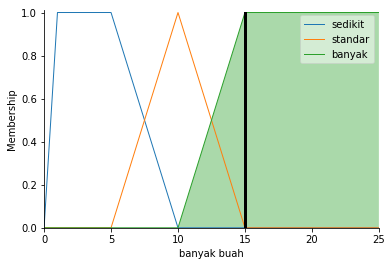

In [51]:
buah.view(sim=tipping)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


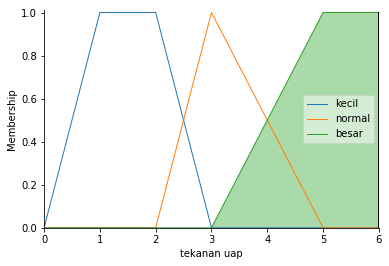

In [52]:
uap.view(sim=tipping)

# Aggregasi

- [R5] If Buah is _standar_ and Uap is _Normal_ then Waktu is Sedang

$$
Rule 5	= BuahStandar \cap UapNormal\\
   min  = ( BuahStandar [15], UapNormal [10])\\
   min  = ( 0; 0.5 )\\
   min  =	0
$$

Aggregasi (Nilai Max)

$$
       0 = (x-20) / (40-20)\\
       0 = (x-20) / (20)\\
       0 = x-20\\
       x = 0
$$

- [R8] If Buah is _banyak_ and Uap is _Normal_ then Waktu is Lama

$$
Rule 8	= BuahBanyak \cap UapNormal\\
   min  = ( BuahBanyak [15], CahayaTerang [10])\\
   min  = ( 0.3; 0.5 )\\
   min  =	0.15
$$

Aggregasi (Nilai Max)

$$
       0.15 = (x-20) / (40-20)\\
       0.15 = (x-20) / (20)\\
          3 = x-20\\
       x = 60
$$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


23.333333333333336


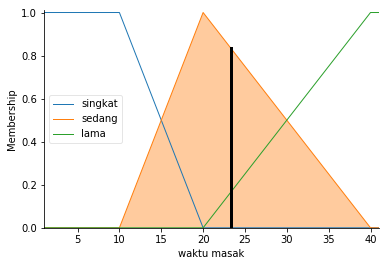

In [55]:
waktu.view(sim=tipping)
print(tipping.output['waktu masak'])

# Perhitungan Manual

waktu masak

 $$ waktu masak = \frac{(13.33 \times 5) + (26.66 \times 5) + (23.33 \times 5) + (26.66 \times 5)}{5+5+5+5} $$
 
 $$ waktu masak = \frac{66.65 + 133.3 + 116.65 + 133.3}{20} $$
 
 $$ waktu masak = \frac{449.9}{20} $$
 
 $$ waktu masak = 22.495 \,  $$

Hasil perhitungan output (waktu) yang didapat menggunakan code python sebesar 23.336, sedangkan jika menggunakan perhitungan manual sebesar 22.495. Disini terdapat perbedaan sebesar 0.841